In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_G1E = pd.read_table("~/qbb2021-answers/week5_hw/G1E_intersect", sep = "\s+", names = ['CHR', 'Start', 'End', 'type', 'default', 'polarity'])
df_ER4 = pd.read_table("~/qbb2021-answers/week5_hw/ER4_intersect", sep = "\s+", names = ['CHR', 'Start', 'End', 'type', 'default', 'polarity'])

In [3]:
G1Etype = df_G1E["type"].value_counts()
G1Etype

intron      225
exon         58
promoter     41
Name: type, dtype: int64

In [4]:
ER4type = df_ER4["type"].value_counts()
ER4type = ER4type[0:3]

In [6]:
sites_gained = pd.read_table("~/qbb2021-answers/week5_hw/sites_gained_after_diferentiation", sep = "\s+", names = ['CHR', 'Start', 'End', 'type', 'default', 'polarity'])
sites_lost = pd.read_table("~/qbb2021-answers/week5_hw/sites_lost_after_diferentiation", sep = "\s+", names = ['CHR', 'Start', 'End', 'type', 'default', 'polarity'])

In [7]:
sites_gained

,CHR,Start,End,type,default,polarity
0,chr19,4136261,4136303,intron,.,-
1,chr19,4136114,4136261,exon,.,-
2,chr19,4136076,4136114,intron,.,-
3,chr19,4169535,4169760,exon,.,-
4,chr19,4169535,4169760,promoter,.,+
...,...,...,...,...,...,...
96,chr19,57482938,57483122,intron,.,+
97,chr19,57816673,57816852,intron,.,+
98,chr19,57876228,57876363,intron,.,+
99,chr19,57998042,57998173,intron,.,+


In [67]:
keys_gained, counts_gained = np.unique(sites_gained["type"], return_counts=True)
keys_lost, counts_lost = np.unique(sites_lost["type"], return_counts=True)

In [72]:
keys_gained

array(['exon', 'intron', 'promoter'], dtype=object)

In [65]:
counts_lost

array([ 3, 16])

In [68]:
counts_lost = np.append(counts_lost, 0)

In [69]:
counts_lost

array([ 3, 16,  0])

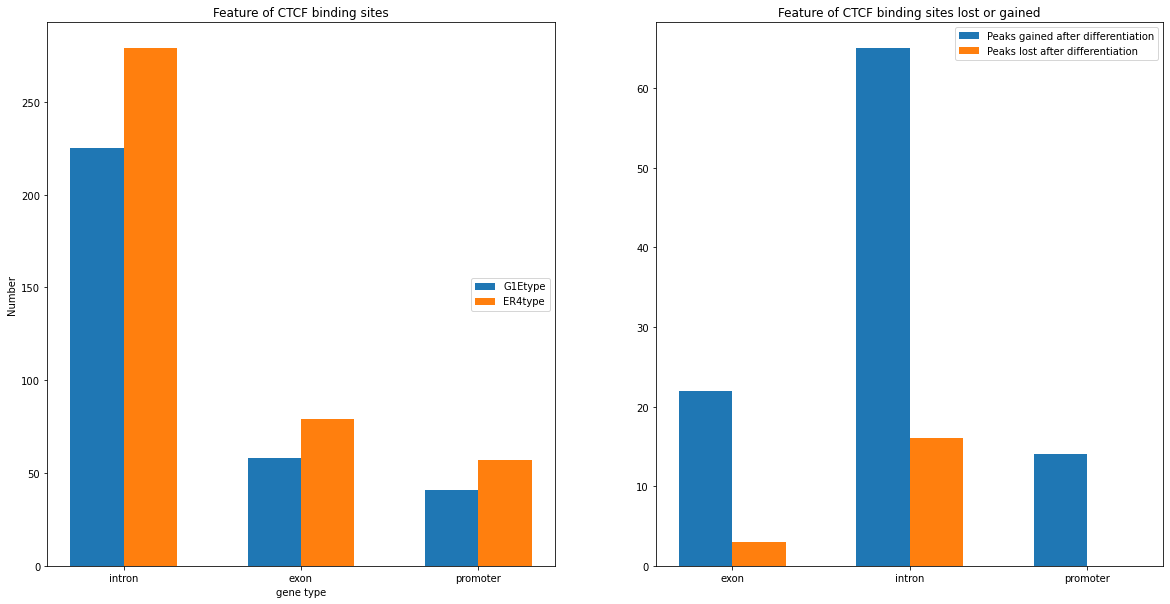

In [74]:
x = ['intron', 'exon', 'promoter']

N = 3


blue_bar = (225, 58, 41)
orange_bar = (279, 79, 57)
ind = np.arange(N)

width = 0.3       

fig, ax = plt.subplots(figsize=(20,10), ncols = 2)

ax[0].bar(ind, blue_bar , width, label='G1Etype')
ax[0].bar(ind + width, orange_bar, width, label='ER4type')

ax[0].set_xlabel('gene type')
ax[0].set_ylabel('Number')
ax[0].set_title('Feature of CTCF binding sites')


ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(['intron', 'exon', 'promoter'])

ax[0].legend(loc='right')

ax[1].bar(ind, counts_gained.tolist(), width, label='Peaks gained after differentiation')
ax[1].bar(ind + width, counts_lost.tolist(), width, label='Peaks lost after differentiation')
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(['exon', 'intron', 'promoter'])

ax[1].legend(loc='upper right')

ax[1].set_title('Feature of CTCF binding sites lost or gained')

plt.show()
